In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-03-BIGDATA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

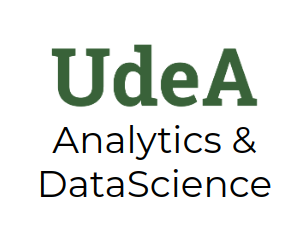

In [2]:
Image("local/imgs/udea-datascience.png")

In [3]:
#Instalación
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz 
!pip install -q findspark

#Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

#SparkContext
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

# **TALLER 3: DATAFRAME**
## Desarrollado por: Mg. Efraín Alberto Oviedo
## Universidad de Antioquia

Por favor, ingrese la siguiente información:

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

#**Pacientes sometidos a cirugías por tumores malignos**

Se dispone de un conjunto de datos (pacientes.json) que contiene datos socio demográficos de pacientes que fueron sometidos a procedimientos quirúrgicos durante los años 2007 a 2018 y cuyos Códigos Internacionales de Enfermedades (CIE-10) correspondía a tumores malignos. Tomado de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Perfil-socio-demogr-fico-pacientes-sometidos-a-cir/i45c-f4fs


Por cada paciente, se dispone de los siguientes atributos:
 
* DiagnosticoAgrupado: Nombre del Grupo de Diagnóstico Agrupado
* Cirugia: Descripción del Procedimiento Quirúrgico
* TipoAtencion: Tipo de atención que generó el procedimiento (Urgencia-Programada)
* Edad: Edad en años del paciente
* Subregion: Subregión del departamento de la cual proviene el paciente
* Regimen: Régimen de salud al cual pertenecía el paciente al momento del procedimiento
* Genero: Genero del paciente
* Estado_Civil: Estado civil del paciente al momento del procedimiento quirúrgico
* Etnia: Etnia a la cual pertenecía el paciente al momento del procedimiento quirúrgico
* Estrato: Nivel socio económico del paciente al momento del procedimiento quirúrgico
* Año en el cual fue realizado el procedimiento quirúrgico

Se requiere de su apoyo para comprender el comportamiento de esta enfermedad, respondiendo las siguientes inquietudes:



##**A) Calidad de datos**

Revise cada una de las variables disponibles y solucione los posibles problemas presentes respecto a registros nulos y atípicos.

Analice el tipo de dato utilizado para cada variable y realice los ajustes que considere necesarios para optimizar el almacenamiento

Justificando las decisiones tomadas en cada caso 

In [4]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import functions
from pyspark.sql.functions import isnan, when, count, col, col, countDistinct, trim
sqlCtx = SQLContext(sc)

In [5]:
raw = sqlCtx.read.json('local/data/pacientes.json')

In [6]:
print('No. Registros', raw.count())
raw.printSchema()
raw.show(2)

No. Registros 14252
root
 |-- Año: long (nullable = true)
 |-- Cirugia: string (nullable = true)
 |-- DiagnosticoAgrupado: string (nullable = true)
 |-- Edad: long (nullable = true)
 |-- Estado_Civil: string (nullable = true)
 |-- Estrato: string (nullable = true)
 |-- Etnia: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Regimen: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- TipoAtencion: string (nullable = true)

+----+-----------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
| Año|          Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|   Etnia|Genero|   Regimen| Subregion|TipoAtencion|
+----+-----------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
|2007|TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|PARTICULAR|Centro Sur|    Urgencia|
|2007|TRAQUEOSTOMIA SOD|CARCINOMA I

In [7]:
schema = StructType()\
      .add("Año",ShortType(),True) \
      .add("Cirugia",StringType(),True) \
      .add("DiagnosticoAgrupado",StringType(),True) \
      .add("Edad",ByteType(),True) \
      .add("Estado_Civil",StringType(),True) \
      .add("Estrato",StringType(),True) \
      .add("Etnia", StringType(),True) \
      .add("Genero", StringType(),True) \
      .add("Regimen", StringType(),True) \
      .add("Subregion", StringType(),True) \
      .add("TipoAtencion",StringType(),True)

In [8]:
df = sqlCtx.read.json('local/data/pacientes.json',schema)
df = df.withColumn('Cirugia', trim(df.Cirugia))
df = df.withColumn('DiagnosticoAgrupado', trim(df.DiagnosticoAgrupado))
df = df.withColumn('Estrato', trim(df.Estrato))
df = df.withColumn('Etnia', trim(df.Etnia))
df = df.withColumn('Regimen', trim(df.Regimen))
df.printSchema()
df.show(4)

root
 |-- Año: short (nullable = true)
 |-- Cirugia: string (nullable = true)
 |-- DiagnosticoAgrupado: string (nullable = true)
 |-- Edad: byte (nullable = true)
 |-- Estado_Civil: string (nullable = true)
 |-- Estrato: string (nullable = true)
 |-- Etnia: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Regimen: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- TipoAtencion: string (nullable = true)

+----+--------------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
| Año|             Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|   Etnia|Genero|   Regimen| Subregion|TipoAtencion|
+----+--------------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|PARTICULAR|Centro Sur|    Urgencia|
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SI

In [9]:
df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns)).show()

+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
|Año|Cirugia|DiagnosticoAgrupado|Edad|Estado_Civil|Estrato|Etnia|Genero|Regimen|Subregion|TipoAtencion|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
| 12|    675|                 82|  82|           7|      8|    3|     3|      6|        7|           3|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+



In [10]:
df.describe(['Edad', 'Año']).show()

+-------+------------------+------------------+
|summary|              Edad|               Año|
+-------+------------------+------------------+
|  count|             14127|             14127|
|   mean|59.667232958165215|2012.7959934876478|
| stddev|14.969170881821189| 3.419593306182815|
|    min|                10|              2007|
|    max|                95|              2018|
+-------+------------------+------------------+



In [11]:
df = df.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in df.columns])
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
|Año|Cirugia|DiagnosticoAgrupado|Edad|Estado_Civil|Estrato|Etnia|Genero|Regimen|Subregion|TipoAtencion|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
|125|      0|                  0| 125|         125|    125|  125|   125|    125|      125|         125|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+



In [12]:
df.summary("count", "min", "25%", "mean", "50%", "75%", "max").show()

+-------+------------------+--------------------+--------------------+------------------+------------+---------+--------+------+------------+--------------+------------+
|summary|               Año|             Cirugia| DiagnosticoAgrupado|              Edad|Estado_Civil|  Estrato|   Etnia|Genero|     Regimen|     Subregion|TipoAtencion|
+-------+------------------+--------------------+--------------------+------------------+------------+---------+--------+------+------------+--------------+------------+
|  count|             14127|               14252|               14252|             14127|       14127|    14127|   14127| 14127|       14127|         14127|       14127|
|    min|              2007|ADENOAMIGDALECTOM...|CARCINOMA IN SITU...|                10|      Casado|Estrato 0|Indigena|     F|CONTRIBUTIVO|Alto Occidente|  Programada|
|    25%|              2010|                null|                null|                50|        null|     null|    null|  null|        null|         

In [13]:
df.select(['Estrato']).distinct().show()

+---------+
|  Estrato|
+---------+
|Estrato 3|
|     null|
|Estrato 2|
|Estrato 6|
|Estrato 4|
|Estrato 0|
|Estrato 1|
|Estrato 5|
+---------+



Presente aquí el código desarrollado y el resultado obtenido

##**B) Análisis por rango de edad**

Identifique las 5 cirugías mas frecuentes para los mayores de 80 años y para los menores de 20 años, indicando la influencia del género para cada grupo de edad 

In [14]:
df.groupBy('Genero').count().show()

+------+-----+
|Genero|count|
+------+-----+
|     F| 7784|
|  null|  125|
|     M| 6343|
+------+-----+



In [15]:
df.filter((df.Edad>80)|(df.Genero=='M')).groupBy('Cirugia', 'Genero').count().orderBy('count', ascending=False).show(5, truncate=False)
df.filter((df.Edad>80)|(df.Genero=='F')).groupBy('Cirugia', 'Genero').count().orderBy('count', ascending=False).show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+-----+
|Cirugia                                                                                                                 |Genero|count|
+------------------------------------------------------------------------------------------------------------------------+------+-----+
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |M     |249  |
|RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO DE AREA ESPECIAL ENTRE DOS A TRES CENTIMETROS|M     |230  |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |M     |224  |
|GASTRECTOMIA TOTAL CON INTERPOSICION INTESTINAL SOD                                                                     |M     |180  |
|RESECCION DE TUMOR MALIGNO  DE PIEL Y/O TEJIDO 

In [16]:
df.filter((df.Edad<20)|(df.Genero=='M')).groupBy('Cirugia', 'Genero').count().orderBy('count', ascending=False).show(5, truncate=False)
df.filter((df.Edad<20)|(df.Genero=='F')).groupBy('Cirugia', 'Genero').count().orderBy('count', ascending=False).show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+-----+
|Cirugia                                                                                                                 |Genero|count|
+------------------------------------------------------------------------------------------------------------------------+------+-----+
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |M     |249  |
|RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO DE AREA ESPECIAL ENTRE DOS A TRES CENTIMETROS|M     |230  |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |M     |224  |
|GASTRECTOMIA TOTAL CON INTERPOSICION INTESTINAL SOD                                                                     |M     |180  |
|RESECCION DE TUMOR MALIGNO  DE PIEL Y/O TEJIDO 

##**C) Análisis por diagnóstico**

Identifique los cinco tipos de diagnóstico más comunes y para ellos presente el promedio de edad por género y Subregión

In [17]:
top5 = df.groupBy('DiagnosticoAgrupado')\
         .count()\
         .orderBy('count', ascending=False)\
         .take(5)
top5 = [top5[i].DiagnosticoAgrupado for i in range(len(top5))]
top5

['OTROS TUMORES MALIGNOS DE LA PIEL.',
 'TUMOR MALIGNO DEL ESTOMAGO',
 'TUMOR MALIGNO DE LA GLANDULA TIROIDES',
 'TUMOR MALIGNO DEL COLON',
 'TUMOR MALIGNO DE LA MAMA']

In [18]:
df.filter((~df.Edad.isNull())&(df.DiagnosticoAgrupado.isin(top5)))\
  .groupBy('DiagnosticoAgrupado','Subregion')\
  .pivot('Genero')\
  .agg({'Edad':'avg'})\
  .orderBy('DiagnosticoAgrupado','Subregion')\
  .show(30, truncate=False)

+-------------------------------------+------------------+------------------+------------------+
|DiagnosticoAgrupado                  |Subregion         |F                 |M                 |
+-------------------------------------+------------------+------------------+------------------+
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Alto Occidente    |66.01769911504425 |66.35862068965517 |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Alto Oriente      |82.0              |59.63793103448276 |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Bajo Occidente    |65.26229508196721 |69.57142857142857 |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Centro Sur        |64.08191653786707 |65.04841149773071 |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Magdalena Caldense|67.06451612903226 |65.83076923076923 |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Norte             |67.71774193548387 |66.3360655737705  |
|TUMOR MALIGNO DE LA GLANDULA TIROIDES|Alto Occidente    |46.0609756097561  |52.125            |
|TUMOR MALIGNO DE LA GLANDULA 

##**D) Análisis por estrato y estado civil**

Identifique para el total de pacientes, cuáles son los 5 tipos de cirugías más frecuentes. Para cada tipo de cirugía calcule el porcentaje de ocurrencia para las variables estrato y estado civil

In [19]:
top5 = df.groupBy('Cirugia')\
         .count()\
         .orderBy('count', ascending=False)\
         .take(5)
top5 = [top5[i].Cirugia for i in range(len(top5))]
top5

['COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS',
 'TIROIDECTOMIA TOTAL SOD',
 'RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO DE AREA ESPECIAL ENTRE DOS A TRES CENTIMETROS',
 'VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD',
 'ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD']

In [20]:
df.filter(df.Cirugia.isin(top5))\
  .groupBy('Cirugia')\
  .pivot('Estrato')\
  .count()\
  .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+---------+---------+---------+---------+---------+
|Cirugia                                                                                                                 |Estrato 0|Estrato 1|Estrato 2|Estrato 3|Estrato 4|
+------------------------------------------------------------------------------------------------------------------------+---------+---------+---------+---------+---------+
|VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD                                                                          |135      |107      |46       |127      |1        |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |333      |164      |86       |114      |4        |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |114      |153

In [21]:
df.filter(df.Cirugia.isin(top5))\
  .groupBy('Cirugia')\
  .pivot('Estado_Civil')\
  .count()\
  .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+----+---+-------+-----------+-----+
|Cirugia                                                                                                                 |Casado|M   |P  |Soltero|Union Libre|Viudo|
+------------------------------------------------------------------------------------------------------------------------+------+----+---+-------+-----------+-----+
|VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD                                                                          |234   |3   |9  |119    |16         |35   |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |438   |null|13 |137    |36         |77   |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |251   |null|4  |65     |10         |30   |
|RESECCION

In [22]:
def top5cirugia(x):
  return x in top5
df.registerTempTable('pacientes')
sqlCtx.registerFunction("top5cirugia",top5cirugia)

<function __main__.top5cirugia>

In [23]:
sqlCtx.sql('select * from pacientes where top5cirugia(Cirugia)=true').show()

+----+--------------------+--------------------+----+------------+---------+-------+------+------------+------------------+------------+
| Año|             Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|  Etnia|Genero|     Regimen|         Subregion|TipoAtencion|
+----+--------------------+--------------------+----+------------+---------+-------+------+------------+------------------+------------+
|2007|VACIAMIENTO RADIC...|TUMOR MALIGNO DE ...|  57|      Casado|Estrato 1|Ninguna|     F|CONTRIBUTIVO|        Centro Sur|  Programada|
|2007|ANASTOMOSIS DE IN...|TUMOR MALIGNO DEL...|  77|      Casado|Estrato 1|Ninguna|     M|CONTRIBUTIVO|        Centro Sur|    Urgencia|
|2007|ANASTOMOSIS DE IN...|TUMOR MALIGNO DEL...|  77|      Casado|Estrato 1|Ninguna|     M|CONTRIBUTIVO|        Centro Sur|    Urgencia|
|2007|VACIAMIENTO RADIC...|TUMOR MALIGNO DE ...|  55|     Soltero|Estrato 1|Ninguna|     F|CONTRIBUTIVO|        Centro Sur|  Programada|
|2007|TIROIDECTOMIA TOT...|TUMOR MALIGNO 

Presente aquí el código desarrollado y el resultado obtenido

##**E) Seguimiento de las cirugías en el tiempo**

Para los cinco tipos de cirugías más frecuentes, verifique si los casos han aumentado o disminuido en los últimos cinco años.
Para cada cirugía presente el promedio de edad de los pacientes por género en cada año

In [24]:
df.filter(df.Cirugia.isin(top5))\
  .groupBy('Cirugia')\
  .pivot('Año')\
  .count()\
  .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+----+----+----+----+----+----+----+
|Cirugia                                                                                                                 |2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|
+------------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+----+----+----+----+----+----+----+
|VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD                                                                          |10  |2   |7   |9   |19  |22  |33  |26  |63  |72  |72  |81  |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |5   |null|3   |35  |25  |71  |118 |85  |78  |77  |95  |109 |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                            

In [25]:
df.filter(df.Cirugia.isin(top5))\
  .groupBy('Cirugia', 'Genero')\
  .pivot('Año')\
  .agg({'Edad': 'avg'})\
  .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Cirugia                                                                                                                 |Genero|2007             |2008             |2009              |2010              |2011             |2012              |2013              |2014              |2015              |2016              |2017              |2018              |
+------------------------------------------------------------------------------------------------------------------------+------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------

Presente aquí el código desarrollado y el resultado obtenido

#**Notas:**

* Analice los resultados de cada punto y presente sus conclusiones
* Utilice al menos una vez cada uno de los siguientes métodos

  *   agg
  *   withColumn
  *   groupBy
  *   sql
  *   registerFunction

